In [1]:
# python version 3.6.9 #
import pandas as pd # 1.1.5
import numpy as np # 1.19.5
import matplotlib.pyplot as plt
import matplotlib # 3.3.4
import scipy.stats as st # scipy 1.5.4
import random

matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
plt.rc('text', usetex=False)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 16})
plt.style.use('source_data/included/figure.style')


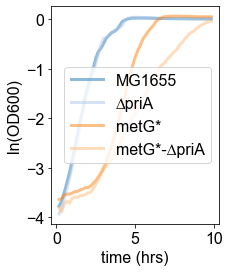

In [2]:
cm = plt.cm.get_cmap('tab20')

table = pd.read_csv('source_data/included/priA_growth.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(3,4))
min_t = 0
max_t = 10
table = table.loc[table.index<max_t]
table = table.loc[table.index>min_t]
table

ids = ['MG1655','∆priA','metG*','metG*-∆priA']
col = 0
for i in ids:
    x = table.index
    cols = [i,i+'.1']
    y = table[cols].mean(axis=1)
    ax.plot(x,y,color=cm(col),alpha=0.5,label=i)
    col+=1
ax.set_ylabel('ln(OD600)')
ax.set_xlabel('time (hrs)')
ax.legend(fontsize=16)
plt.savefig('figures/figED11a.pdf')
table[ids].to_csv('source_data/source_tables/figED11a.csv')

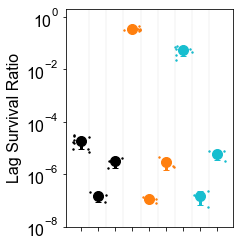

In [3]:
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[(table['overnight_length']<40)&(table['overnight_length']>20)]
table = table.loc[table['abx']=='amp+cipro']
cm = plt.cm.get_cmap('tab20')
samples = ['wt','Δlon','Δlon-ΔsulA','metG*','metG*-Δlon','metG*-Δlon-ΔsulA','metG*-ΔyqgE','metG*-ΔyqgE-Δlon','metG*-ΔyqgE-Δlon-ΔsulA']
colors = ['k','k','k',cm(2),cm(2),cm(2),cm(18),cm(18),cm(18)]
fig,ax = plt.subplots(figsize=(3,4))
i=0
for s,c in zip(samples,colors):
    y = table.loc[(table.index==s),'lag_survival']
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.5)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([i]*len(y),l)],y,s=2,color=c)
    ax.errorbar(i,y.mean(),xerr=None,marker='.',markersize=20,yerr=y.std(),color=c,capsize=3)
    i+=1

for i in [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)

ax.set_yscale('log')
ax.set_ylim(10**(-8),2)
ax.set_xticks([0,1,2,3,4,5,6,7,8])
ax.set_xticklabels([])
ax.set_ylabel('Lag Survival Ratio',size=16)

plt.savefig('figures/figED11b.pdf')

pd.DataFrame(table.loc[samples,'lag_survival']).to_csv('source_data/source_tables/figED11b.csv')

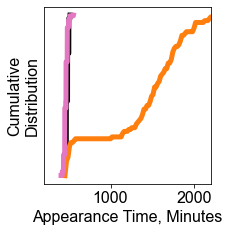

In [4]:
# fig ED11c appearance times #

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)
xmin = 200
xmax = 2200
alpha=1
colors=['k',cm(2),cm(12)]
fig, ax = plt.subplots(figsize=(3,3.25))
i=0
for t in ['wt_20221104','metG_20221104','metG-∆lon-∆sulA-1_20221104']:
    data = appearance_times.loc[t,'appearance']
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:], cdf,linewidth=5,color=colors[i],alpha=alpha)
    ax.set_yticks([])
    ax.set_xlim([xmin,xmax])
    i+=1
ax.set_ylabel('Cumulative\nDistribution',size=16)
ax.set_xlabel('Appearance Time, Minutes',size=16) 
plt.savefig('figures/figED11c.pdf')

all_df = pd.DataFrame()
for sample in ['wt_20221104','metG_20221104','metG-∆lon-∆sulA-1_20221104']:
    df = pd.DataFrame(appearance_times.loc[sample].reset_index()['appearance'])
    df.columns = [sample]
    all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/EDfig11c.csv')

WilcoxonResult(statistic=2.0, pvalue=0.09375)
WilcoxonResult(statistic=0.0, pvalue=0.03125)
4.111114641234204
WilcoxonResult(statistic=0.0, pvalue=0.03125)
3.2018494502913315
WilcoxonResult(statistic=0.0, pvalue=0.03125)
21.802835563057663
WilcoxonResult(statistic=3.0, pvalue=0.15625)
WilcoxonResult(statistic=0.0, pvalue=0.03125)
2.6986104571842713
WilcoxonResult(statistic=0.0, pvalue=0.03125)
3.3460126734157862
WilcoxonResult(statistic=0.0, pvalue=0.03125)
15.943711672248131
WilcoxonResult(statistic=5.0, pvalue=0.3125)
WilcoxonResult(statistic=2.0, pvalue=0.09375)
1:50 + amp
WilcoxonResult(statistic=10.0, pvalue=1.0)
WilcoxonResult(statistic=0.0, pvalue=0.03125)
4.342865796472892
WilcoxonResult(statistic=9.0, pvalue=0.6875)
WilcoxonResult(statistic=3.0, pvalue=0.15625)
WilcoxonResult(statistic=7.0, pvalue=0.5)
WilcoxonResult(statistic=11.0, pvalue=0.84375)


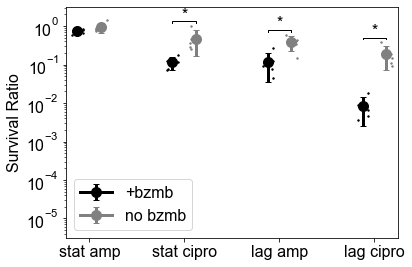

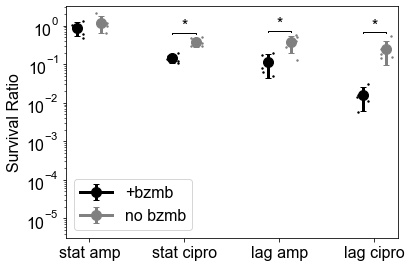

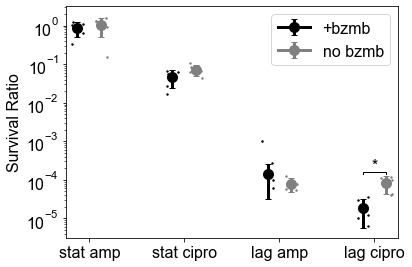

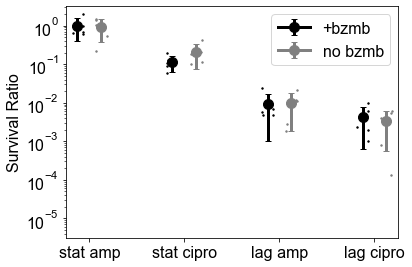

In [5]:
## panel E

table = pd.read_csv('source_data/included/figED11_bortezomib.txt',sep='\t',index_col=[0,1])
cm = plt.cm.get_cmap('tab20c')
colors = ['k','grey']
conditions = ['stat+amp','stat+cipro','1:50 + amp','1:50 + cipro']
dils = [1,1,50,50]

random.seed(1)
fig,ax = plt.subplots(figsize=(6,4))

strain = 40

z = 0
for condition,d in zip(conditions,dils):
    y = table[condition]/(table['pre-abx']/d)
    y1 = y.loc[(table.index.get_level_values(1) == 'w/ bz') & (table.index.get_level_values(0) == strain)]
    y1 = y1.dropna()
    if y1.mean() - y1.std() <0:
        print(condition)
        y1_sub = y1.iloc[[0,2,3]]
    else:
        y1_sub = y1.copy()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y1))]
    ax.scatter(l,y1,s=2,color=colors[0])
    ax.errorbar(z,y1_sub.mean(),xerr=None,marker='.',markersize=20,yerr=y1_sub.std(),color=colors[0],capsize=3)
    z+=1
    y2 =  y.loc[(table.index.get_level_values(1) == 'no bz') & (table.index.get_level_values(0) == strain)]
    y2 = y2.dropna()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y2))]
    ax.scatter(l,y2,s=2,color=colors[1])
    ax.errorbar(z,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=colors[1],capsize=3)
    print(st.wilcoxon(y1,y2,alternative='less'))
    p_val = st.wilcoxon(y1,y2,alternative='less')[1]
    if (p_val<0.05):
        x1 = z-1
        x2 = z
        y = 1.2*max([max(y1),max(y2)])
        h = 0.1 * y
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
        ax.text((x1+x2)*.5, 0.95*(y+h), "*", ha='center', va='bottom', color='k')
        print(y2.mean()/y1.mean())
    z+=3

ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[0],capsize=3,label='+bzmb')
ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[1],capsize=3,label='no bzmb')
ax.legend()

# # ## aesthetics ##
ax.set_ylabel('Survival Ratio')
ax.set_xlim(-0.5,z-2.5)
ax.set_yscale('log')
ax.set_xticks([0.5,4.5,8.5,12.5])
ax.set_xticklabels(['stat amp','stat cipro','lag amp','lag cipro'])
ax.set_ylim(10**-5.5,10**0.5)
plt.tight_layout()
plt.savefig('figures/figED11e_1.pdf')

random.seed(1)
fig,ax = plt.subplots(figsize=(6,4))
strain = 152

z = 0
for condition,d in zip(conditions,dils):
    y = table[condition]/(table['pre-abx']/d)
    y1 = y.loc[(table.index.get_level_values(1) == 'w/ bz') & (table.index.get_level_values(0) == strain)]
    y1 = y1.dropna()
    if y1.mean() - y1.std() <0:
        print(condition)
        y1_sub = y1.iloc[[0,2,3]]
    else:
        y1_sub = y1.copy()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y1))]
    ax.scatter(l,y1,s=2,color=colors[0])
    ax.errorbar(z,y1_sub.mean(),xerr=None,marker='.',markersize=20,yerr=y1_sub.std(),color=colors[0],capsize=3)
    z+=1
    y2 =  y.loc[(table.index.get_level_values(1) == 'no bz') & (table.index.get_level_values(0) == strain)]
    y2 = y2.dropna()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y2))]
    ax.scatter(l,y2,s=2,color=colors[1])
    ax.errorbar(z,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=colors[1],capsize=3)
    print(st.wilcoxon(y1,y2,alternative='less'))
    p_val = st.wilcoxon(y1,y2,alternative='less')[1]
    if (p_val<0.05):
        x1 = z-1
        x2 = z
        y = 1.2*max([max(y1),max(y2)])
        h = 0.1 * y
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
        ax.text((x1+x2)*.5, 0.95*(y+h), "*", ha='center', va='bottom', color='k')
        print(y2.mean()/y1.mean())
    z+=3

ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[0],capsize=3,label='+bzmb')
ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[1],capsize=3,label='no bzmb')
ax.legend()

# # ## aesthetics ##
ax.set_ylabel('Survival Ratio')
ax.set_xlim(-0.5,z-2.5)
ax.set_yscale('log')
ax.set_xticks([0.5,4.5,8.5,12.5])
ax.set_xticklabels(['stat amp','stat cipro','lag amp','lag cipro'])
ax.set_ylim(10**-5.5,10**0.5)
plt.tight_layout()
plt.savefig('figures/figED11e_2.pdf')

strain = 35

random.seed(1)
fig,ax = plt.subplots(figsize=(6,4))
z = 0
for condition,d in zip(conditions,dils):
    y = table[condition]/(table['pre-abx']/d)
    y1 = y.loc[(table.index.get_level_values(1) == 'w/ bz') & (table.index.get_level_values(0) == strain)]
    y1 = y1.dropna()
    if y1.mean() - y1.std() <0:
        print(condition)
        y1_sub = y1.iloc[[0,2,3]]
    else:
        y1_sub = y1.copy()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y1))]
    ax.scatter(l,y1,s=2,color=colors[0])
    ax.errorbar(z,y1_sub.mean(),xerr=None,marker='.',markersize=20,yerr=y1_sub.std(),color=colors[0],capsize=3)
    z+=1
    y2 =  y.loc[(table.index.get_level_values(1) == 'no bz') & (table.index.get_level_values(0) == strain)]
    y2 = y2.dropna()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y2))]
    ax.scatter(l,y2,s=2,color=colors[1])
    ax.errorbar(z,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=colors[1],capsize=3)
    print(st.wilcoxon(y1,y2,alternative='less'))
    p_val = st.wilcoxon(y1,y2,alternative='less')[1]
    if (p_val<0.05):
        x1 = z-1
        x2 = z
        y = 1.2*max([max(y1),max(y2)])
        h = 0.1 * y
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
        ax.text((x1+x2)*.5, 0.95*(y+h), "*", ha='center', va='bottom', color='k')
        print(y2.mean()/y1.mean())
    z+=3

ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[0],capsize=3,label='+bzmb')
ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[1],capsize=3,label='no bzmb')
ax.legend()

# # ## aesthetics ##
ax.set_ylabel('Survival Ratio')
ax.set_xlim(-0.5,z-2.5)
ax.set_yscale('log')
ax.set_xticks([0.5,4.5,8.5,12.5])
ax.set_xticklabels(['stat amp','stat cipro','lag amp','lag cipro'])
ax.set_ylim(10**-5.5,10**0.5)
plt.tight_layout()
plt.savefig('figures/figED11e_3.pdf')

random.seed(1)
fig,ax = plt.subplots(figsize=(6,4))

strain = 50
z = 0
for condition,d in zip(conditions,dils):
    y = table[condition]/(table['pre-abx']/d)
    y1 = y.loc[(table.index.get_level_values(1) == 'w/ bz') & (table.index.get_level_values(0) == strain)]
    y1 = y1.dropna()
    if y1.mean() - y1.std() <0:
        print(condition)
        y1_sub = y1.iloc[[0,2,3]]
    else:
        y1_sub = y1.copy()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y1))]
    ax.scatter(l,y1,s=2,color=colors[0])
    ax.errorbar(z,y1_sub.mean(),xerr=None,marker='.',markersize=20,yerr=y1_sub.std(),color=colors[0],capsize=3)
    z+=1
    y2 =  y.loc[(table.index.get_level_values(1) == 'no bz') & (table.index.get_level_values(0) == strain)]
    y2 = y2.dropna()
    l = []
    [l.append(z + np.random.choice([-1, 1]) * random.uniform(0.2,0.25)) for i in range(0,len(y2))]
    ax.scatter(l,y2,s=2,color=colors[1])
    ax.errorbar(z,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=colors[1],capsize=3)
    print(st.wilcoxon(y1,y2,alternative='less'))
    p_val = st.wilcoxon(y1,y2,alternative='less')[1]
    if (p_val<0.05):
        x1 = z-1
        x2 = z
        y = 1.2*max([max(y1),max(y2)])
        h = 0.1 * y
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
        ax.text((x1+x2)*.5, 0.95*(y+h), "*", ha='center', va='bottom', color='k')
        print(y2.mean()/y1.mean())
    z+=3

ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[0],capsize=3,label='+bzmb')
ax.errorbar(0,10,xerr=None,marker='.',markersize=20,yerr=0,color=colors[1],capsize=3,label='no bzmb')
ax.legend()

# # ## aesthetics ##
ax.set_ylabel('Survival Ratio')
ax.set_xlim(-0.5,z-2.5)
ax.set_yscale('log')
ax.set_xticks([0.5,4.5,8.5,12.5])
ax.set_xticklabels(['stat amp','stat cipro','lag amp','lag cipro'])
ax.set_ylim(10**-5.5,10**0.5)
plt.tight_layout()
plt.savefig('figures/figED11e_4.pdf')

No handles with labels found to put in legend.


SpearmanrResult(correlation=-0.024708310555370042, pvalue=0.9536907698036321)
SpearmanrResult(correlation=0.9018533352710066, pvalue=0.0021929935684288624)


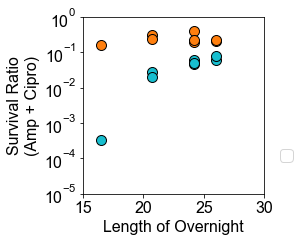

In [6]:
cm = plt.cm.get_cmap('tab10')

table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[table['overnight_length']<40]
table = table[['lag_survival','abx','overnight_length']]
table = table.loc[table['abx']=='cipro']
samples = ['metG*','metG*-ΔyqgE']
table = table.loc[samples].dropna()

fig,ax = plt.subplots(figsize=(3.25,3.25))
ax.scatter(table.loc['metG*','overnight_length'],table.loc['metG*','lag_survival'],color=cm(1),alpha=1,s=100,edgecolors='k')
ax.scatter(table.loc['metG*-ΔyqgE','overnight_length'],table.loc['metG*-ΔyqgE','lag_survival'],color=cm(9),alpha=1,s=100,edgecolors='k')
ax.set_yscale('log')
ax.set_ylim(10**(-5),1)
ax.set_yticks([10**-5,10**-4,10**-3,10**-2,10**-1,1])
ax.set_xticks([15,20,25,30])

ax.legend(bbox_to_anchor=(1.2, 0.3),fontsize=16)
ax.set_ylabel('Survival Ratio\n(Amp + Cipro)',size=16)
ax.set_xlabel('Length of Overnight',size=16)
plt.xticks(size=16)
plt.yticks(size=16)
plt.savefig('figures/figED11f.pdf')

x = table.loc['metG*','overnight_length']
y = table.loc['metG*','lag_survival']
print(st.spearmanr(x,y))

x = table.loc['metG*-ΔyqgE','overnight_length']
y = table.loc['metG*-ΔyqgE','lag_survival']
print(st.spearmanr(x,y))

table.to_csv('source_data/source_tables/figED11f.csv')

MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)


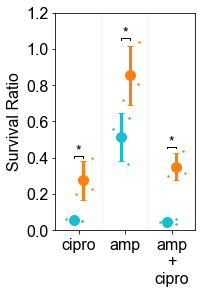

In [7]:
cm = plt.cm.get_cmap('tab10')
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[(table['overnight_length']>24)&(table['overnight_length']<25)]
table = table[['lag_survival','abx','overnight_length']]
random.seed(1)
fig,ax = plt.subplots(figsize=(2.5,4))
random.seed(1)
## cipro ##
y1 = table.loc[(table['abx']=='cipro')&(table.index=='metG*'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0.1]*len(y1),l)],y1,s=2,color=cm(1))
ax.errorbar(0.1,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(1),capsize=3)

y2 = table.loc[(table['abx']=='cipro')&(table.index=='metG*-ΔyqgE'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([-0.1]*len(y2),l)],y2,s=2,color=cm(9))
ax.errorbar(-0.1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(9),capsize=3)
print(st.mannwhitneyu(y1,y2))

## amp ##
y1 = table.loc[(table['abx']=='amp')&(table.index=='metG*'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([1.1]*len(y1),l)],y1,s=2,color=cm(1))
ax.errorbar(1.1,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(1),capsize=3)

y2 = table.loc[(table['abx']=='amp')&(table.index=='metG*-ΔyqgE'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([0.9]*len(y2),l)],y2,s=2,color=cm(9))
ax.errorbar(0.9,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(9),capsize=3)
print(st.mannwhitneyu(y1,y2))

## both ##
y1 = table.loc[(table['abx']=='amp+cipro')&(table.index=='metG*'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([2.1]*len(y1),l)],y1,s=2,color=cm(1))
ax.errorbar(2.1,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(1),capsize=3)

y2 = table.loc[(table['abx']=='amp+cipro')&(table.index=='metG*-ΔyqgE'),'lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.2)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([1.9]*len(y2),l)],y2,s=2,color=cm(9))
ax.errorbar(1.9,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(9),capsize=3)
print(st.mannwhitneyu(y1,y2))

## aesthetics ##
for i in [0.5,1.5,2.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)
ax.set_ylabel('Survival Ratio',size=16)
ax.set_xlim(-0.5,2.5)
ax.set_ylim(0,1.2)
ax.set_xticks([0,1,2])
ax.set_xticklabels(['cipro','amp','amp\n+\ncipro'])

## add significance ##
x1 = -0.1
x2 = 0.1
y = 0.4
h = 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.01, "*", ha='center', va='bottom', color='k',size=14)
x1 = 0.9
x2 = 1.1
y = 1.05
h = 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.01, "*", ha='center', va='bottom', color='k',size=14)
x1 = 1.9
x2 = 2.1
y = 0.45
h = 0.01
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.01, "*", ha='center', va='bottom', color='k',size=14)
plt.savefig('figures/figED11g.pdf')


table.loc[['metG*','metG*-ΔyqgE']].to_csv('source_data/source_tables/figED11g.csv')

MannwhitneyuResult(statistic=0.0, pvalue=5.992960581185644e-05)
MannwhitneyuResult(statistic=0.0, pvalue=0.0024808348903269345)
MannwhitneyuResult(statistic=0.0, pvalue=0.003955298415685301)
MannwhitneyuResult(statistic=0.0, pvalue=0.0020502681368022692)
MannwhitneyuResult(statistic=1.5, pvalue=0.013901481217324636)


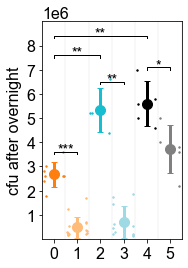

In [8]:
cm = plt.cm.get_cmap('tab20')
table = pd.read_csv('source_data/included/figED11_CFU_table.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(2.5,4))
y1 = table.loc[(table['strain']=='metG*-p-RFP+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0]*len(y1),l)],y1,s=2,color=cm(2))
ax.errorbar(0,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color=cm(2),capsize=3)
y2 = table.loc[(table['strain']=='metG*-p-yqgE+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([1]*len(y2),l)],y2,s=2,color=cm(3))
ax.errorbar(1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(3),capsize=3)
y3 = table.loc[(table['strain']=='metG*-ΔyqgE-p-RFP+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y3))]
ax.scatter([x+y for x,y in zip([2]*len(y3),l)],y3,s=2,color=cm(18))
ax.errorbar(2,y3.mean(),xerr=None,marker='.',markersize=20,yerr=y3.std(),color=cm(18),capsize=3)
y4 = table.loc[(table['strain']=='metG*-ΔyqgE-p-yqgE+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y4))]
ax.scatter([x+y for x,y in zip([3]*len(y4),l)],y4,s=2,color=cm(19))
ax.errorbar(3,y4.mean(),xerr=None,marker='.',markersize=20,yerr=y4.std(),color=cm(19),capsize=3)
y5 = table.loc[(table['strain']=='MG1655-p-RFP+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y5))]
ax.scatter([x+y for x,y in zip([4]*len(y5),l)],y5,s=2,color='k')
ax.errorbar(4,y5.mean(),xerr=None,marker='.',markersize=20,yerr=y5.std(),color='k',capsize=3)
y6 = table.loc[(table['strain']=='MG1655-p-yqgE+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.35,0.45)) for i in range(0,len(y6))]
ax.scatter([x+y for x,y in zip([5]*len(y6),l)],y6,s=2,color='grey')
ax.errorbar(5,y6.mean(),xerr=None,marker='.',markersize=20,yerr=y6.std(),color='gray',capsize=3)

ax.set_xlim(-0.5,5.5)
ax.set_xticks([0,1,2,3,4,5])

for i in [0.5,1.5,2.5,3.5,4.5,5.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)
ax.set_ylabel('cfu after overnight',size=16)
ax.set_ylim(0.01*10**6,9*10**6)
ax.set_yticks([1*10**6,2*10**6,3*10**6,4*10**6,5*10**6,6*10**6,7*10**6,8*10**6])

x1 = 0
x2 = 1
y = 3.5*10**6
h = 0.1*10**6
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.2*10**6, "***", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 6.4*10**6
h = 0.1*10**6
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.2*10**6, "**", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 2
y = 7.5*10**6
h = 0.1*10**6
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.2*10**6, "**", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 4
y = 8.3*10**6
h = 0.1*10**6
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.2*10**6, "**", ha='center', va='bottom', color='k',size=14)

x1 = 4
x2 = 5
y = 7.0*10**6
h = 0.1*10**6
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.2*10**6, "*", ha='center', va='bottom', color='k',size=14)

plt.savefig('figures/figED11h.pdf')

print(st.mannwhitneyu(y1,y2)) # metG*; metG* p-yqgE
print(st.mannwhitneyu(y3,y4)) # metG* ΔyqgE; metG* ΔyqgE p-yqgE
print(st.mannwhitneyu(y3,y1)) # metG* ΔyqgE; metG*
print(st.mannwhitneyu(y1,y5)) # metG, wt
print(st.mannwhitneyu(y5,y6)) # wt ΔyqgE p-RFP+; wt ΔyqgE p-yqgE


table.index = table['strain']
table.loc[['metG*-p-RFP+','metG*-p-yqgE+','metG*-ΔyqgE-p-RFP+','metG*-ΔyqgE-p-yqgE+','MG1655-p-RFP+','MG1655-p-yqgE+'],].to_csv('source_data/source_tables/figED11h.csv')

MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)

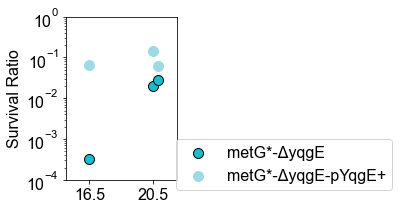

In [9]:
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[(table['overnight_length'])<24].sort_values('overnight_length') # limit to samples with matched overexpression plasmid vs. without
table = table[['lag_survival','abx','overnight_length']]
table = table.loc[table['abx']=='cipro']
samples = ['metG*-ΔyqgE','metG*-ΔyqgE-pYqgE+']
table = table.loc[samples].dropna()

fig,ax = plt.subplots(figsize=(2,3))
x = [16.5,20.5,20.8]
ax.scatter(x,table.loc[samples[0],'lag_survival'],label=samples[0],color=cm(18),edgecolor='k')
ax.scatter(x,table.loc[samples[1],'lag_survival'],label=samples[1],color=cm(19))
ax.set_yscale('log')
ax.set_xlim(15,22)
ax.set_ylim(10**(-4),1)
ax.set_xticks([16.5,20.5])
ax.legend(bbox_to_anchor=(3, 0.3),fontsize=16)
ax.set_ylabel('Survival Ratio',size=16)
plt.savefig('figures/figED11i.pdf')
st.mannwhitneyu(table.loc[samples[0],'lag_survival'],table.loc[samples[1],'lag_survival'])


MannwhitneyuResult(statistic=6.0, pvalue=0.33250277105101456)


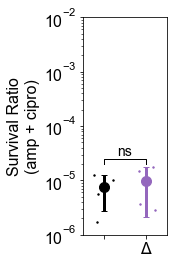

In [10]:
cm = plt.cm.get_cmap('tab20')

table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[(table['overnight_length']<18)]
table = table.loc[(table['abx']=='amp+cipro')]

fig,ax = plt.subplots(figsize=(1.5,4))
y1 = table.loc['wt','lag_survival']
y1 = y1.iloc[[0,1,3,4]] # drop outlier because stdev is high
random.seed(0)
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.1,0.25)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0]*len(y1),l)],y1,s=2,color='k',zorder=10)
ax.errorbar(0,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color='k',capsize=3)

y2 = table.loc['ΔyqgE','lag_survival']
y2 = y2.iloc[1:5] # drop highest value here to match y1
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.1,0.25)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([1]*len(y2),l)],y2,s=2,color=cm(8),zorder=10)
ax.errorbar(1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color=cm(8),capsize=3)

ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
print(st.mannwhitneyu(y1,y2))
ax.set_ylabel('Survival Ratio\n(amp + cipro)',size=16)
ax.set_xticklabels(['','Δ'],rotation=0)
ax.set_ylim(10**-6,10**-2)
ax.set_yscale('log')

x1 = 0
x2 = 1
y = 0.00002
h = 0.000005
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

plt.savefig('figures/figED11j.pdf')



260
243
MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
MannwhitneyuResult(statistic=6.5, pvalue=0.3829774148256451)


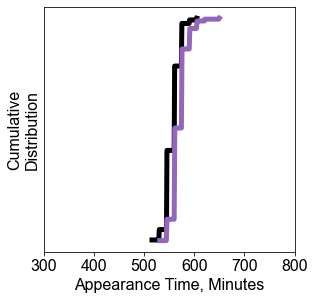

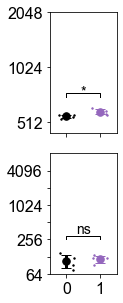

In [11]:
samples = {}
samples['WT'] = ['35-1_20230323','35-2_20230323','35-3_20230323','35-4_20230323'] # wildtype from the same day
samples['∆yqgE'] = ['106-1_20230323','106-2_20230323','106-3_20230323','106-4_20230323'] # ∆yqgE from the same day

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

cm = plt.cm.get_cmap('tab20')
cols = ['k',cm(8)] 

xmin = 300
xmax = 800
alpha=1
fig, ax = plt.subplots(figsize=(4.5,4.5))
i=0

for t in [samples['WT'][0],samples['∆yqgE'][1]]:
    data = appearance_times.loc[t,'appearance']
    print(len(data))
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:],cdf,linewidth=5,color=cols[i],alpha=alpha)
    ax.set_yticks([])
    ax.set_xlim([xmin,xmax])
    i += 1
    
ax.set_ylabel('Cumulative\nDistribution',size=16)
ax.set_xlabel('Appearance Time, Minutes',size=16) 
plt.savefig('figures/figED11k.pdf')


random.seed(0)
cm = plt.cm.get_cmap('tab20')
cols = ['k',cm(8)] 

## retrieve and plot mean appearance
def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
to_plot = ['WT','∆yqgE']
print(st.mannwhitneyu(s_func['∆yqgE'],s_func['WT'])) # test significance
fig,(ax,ax2) = plt.subplots(2,1,figsize=(2,4.5),sharex=True)
x = np.arange(0,len(to_plot))
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev,col in zip(x,means,stdevs,cols):
    y1 = s_func[list(s_func.keys())[x_val]]
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.25)) for i in range(0,len(y1))]
    ax.scatter([x+y for x,y in zip([x_val]*len(y1),l)],y1,s=2,color=col)
    ax.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=15,capsize=5,color=col)

## retrieve and plot appearance range
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
print(st.mannwhitneyu(s_func['∆yqgE'],s_func['WT']))# test significance
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,mean,stdev,col in zip(x,means,stdevs,cols):
    y1 = s_func[list(s_func.keys())[x_val]]
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.25)) for i in range(0,len(y1))]
    ax2.scatter([x+y for x,y in zip([x_val]*len(y1),l)],y1,s=2,color=col)
    ax2.errorbar(x_val,mean,yerr=stdev,fmt=".",markersize=15,capsize=5,color=col)

## add significance to plot
x1 = 0
x2 = 1
y = 700
h = 40
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y-10, "*", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 1
y = 256
h = 35
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+40, "ns", ha='center', va='bottom', color='k',size=14)

## aesthetics ##
ax2.set_xlim(-0.5,len(to_plot)-0.5)
ax2.set_xticks(np.arange(0,len(to_plot)))
ax.set_ylim(400,1700)
ax2.set_ylim(0,2750)
ax.set_yscale('log',base=2)
ax.set_ylim(2**8.8,2**11)
ax.set_yticks([2**9,2**10,2**11])
ax.set_yticklabels([2**9,2**10,2**11])
ax2.set_yscale('log',base=2)
ax2.set_ylim(2**6,2**13)
ax2.set_yticks([2**6,2**7,2**8,2**9,2**10,2**11,2**12])
ax2.set_yticklabels([2**6,'',2**8,'',2**10,'',2**12])
plt.tight_layout()
plt.savefig('figures/figED11k_right.pdf')


samples['WT'] = ['35-1_20230323','35-2_20230323','35-3_20230323','35-4_20230323'] # wildtype from the same day
samples['∆yqgE'] = ['106-1_20230323','106-2_20230323','106-3_20230323','106-4_20230323'] # ∆yqgE from the same day

all_df = pd.DataFrame()
appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)
for s_type in samples.keys():
    for s in samples[s_type]:
        df = appearance_times.loc[s]
        df = df.reset_index()
        df = df.drop('tp',axis=1)
        df.columns = [s]
        all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/figED11k.csv')

MannwhitneyuResult(statistic=5.0, pvalue=1.0059692117906764e-07)
MannwhitneyuResult(statistic=82.0, pvalue=0.006917128192854465)
MannwhitneyuResult(statistic=312.5, pvalue=0.49612742699797974)
MannwhitneyuResult(statistic=31.0, pvalue=0.005344316545294342)
MannwhitneyuResult(statistic=19.0, pvalue=0.09061026819255491)
MannwhitneyuResult(statistic=62.0, pvalue=0.025472113969493844)
MannwhitneyuResult(statistic=50.0, pvalue=0.007755300035707588)


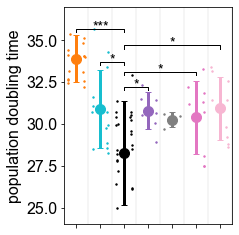

In [12]:
table = pd.read_csv('source_data/included/figED11_doubling_times.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(3,4))
cm = plt.cm.get_cmap('tab20')
cols = [cm(2),cm(18),'k',cm(8),'gray',cm(12),cm(13)]
i=0
for s in ['metG','metG-∆yqgE','MG1655','MG1655-∆yqgE','MG1655-pYqgE+','MG1655-∆lon-∆sulA','metG-∆lon-∆sulA']:
    y = 60*table.loc[s,'doubling_time']
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.25,0.35)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([i]*len(y),l)],y,s=2,color=cols[i])
    ax.errorbar(i,y.mean(),xerr=None,marker='.',markersize=20,yerr=y.std(),color=cols[i],capsize=3)
    i+=1

## aesthetics
ax.set_xlim(-0.5,i-0.5)
ax.set_ylim(24,37)
ax.set_xticks(np.arange(0,i))
ax.set_xticklabels([])
for z in range(0,i):
    ax.axvline(z+0.5,color='grey',linewidth=0.3,alpha=0.5)
ax.set_ylabel('population doubling time',size=16)

## plot significance
x1 = 0
x2 = 2
y = 35.5
h = 0.2
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.3, "***", ha='center', va='bottom', color='k',size=14)

x1 = 1
x2 = 2
y = 33.5
h = 0.2
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.3, "*", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 5
y = 32.9
h = 0.2
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.3, "*", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 6
y = 34.5
h = 0.2
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.3, "*", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 32
h = 0.2
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.3, "*", ha='center', va='bottom', color='k',size=14)

## check significance
for s in ['metG','metG-∆yqgE','MG1655','MG1655-∆yqgE','MG1655-pYqgE+','MG1655-∆lon-∆sulA','metG-∆lon-∆sulA']:
    y = table.loc[s,'doubling_time']
    x = table.loc['MG1655','doubling_time']
    print(st.mannwhitneyu(x,y))

plt.savefig('figures/figED11l.pdf')


296
304
269


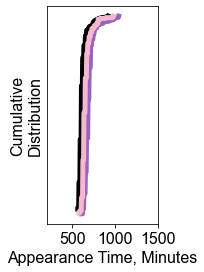

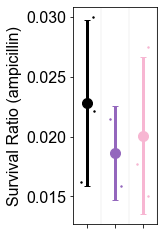

In [13]:
appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)
random.seed(0)
cm = plt.cm.get_cmap('tab20')
xmin = 200
xmax = 1500
alpha=1
cols=['k',cm(8),cm(13)]

fig, ax = plt.subplots(figsize=(2,4))
i=0
for t in ['wildtype_20230117', 'ΔyqgE_20230117', 'Δlon-ΔsulA_20230117']:
    data = appearance_times.loc[t,'appearance']
    print(len(data))
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    ax.plot(bins_count[1:],cdf,linewidth=5,color=cols[i],alpha=alpha)
    ax.set_yticks([])
    ax.set_xlim([xmin,xmax])
    i += 1
ax.set_ylabel('Cumulative\nDistribution',size=16)
ax.set_xlabel('Appearance Time, Minutes',size=16) 

plt.savefig('figures/figED11m_left.pdf')

table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[(table['overnight_length']>100)]
table = table[['lag_survival','abx','overnight_length']]
table = table.loc[table['abx']=='amp']

samples = ['wt','ΔyqgE','Δlon-ΔsulA']
colors=['k',cm(8),cm(13)]
fig,ax = plt.subplots(figsize=(1.5,4))
i=0
for s,c in zip(samples,colors):
    y = table.loc[s,'lag_survival']
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.25)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([i]*len(y),l)],y,s=2,color=c)
    ax.errorbar(i,y.mean(),xerr=None,marker='.',markersize=20,yerr=y.std(),color=c,capsize=3)
    i+=1

for i in [0.5,1.5,2.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)

ax.set_xlim(-0.5,2.5)
ax.set_xticks([0,1,2])
ax.set_xticklabels([])
ax.set_ylabel('Survival Ratio (ampicillin)',size=16)
plt.savefig('figures/figED11m_right.pdf')


MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)


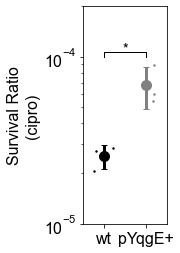

In [14]:
cm = plt.cm.get_cmap('tab20')
random.seed(0)
table = pd.read_csv('source_data/included/fig5_antibiotic_survival.csv',sep=',',index_col=1)
table = table.loc[['MG1655-pRFP+','MG1655-pYqgE+']]
table = table.loc[table['abx']=='cipro']

fig,ax = plt.subplots(figsize=(1.5,4))
y1 = table.loc['MG1655-pRFP+','lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.25)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0]*len(y1),l)],y1,s=2,color='k')
ax.errorbar(0,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color='k',capsize=3)

y2 = table.loc['MG1655-pYqgE+','lag_survival']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.15,0.25)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([1]*len(y2),l)],y2,s=2,color='gray')
ax.errorbar(1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color='gray',capsize=3)
ax.set_xlim(-0.5,1.5)
ax.set_xticks([0,1])
ax.set_ylabel('Survival Ratio\n(cipro)',size=16)
ax.set_xticklabels(['wt','pYqgE+'],rotation=0)
ax.set_ylim(10**-5,2*10**-4)
ax.set_yscale('log')

print(st.mannwhitneyu(y1,y2))

x1 = 0
x2 = 1
y = 0.0001
h = 0.000006
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h-0.000004, "*", ha='center', va='bottom', color='k',size=14)

plt.savefig('figures/figED11n.pdf')

stats for means: wt-Δlon-ΔsulA-pRFP+ vs wt-Δlon-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=10.0, pvalue=0.11488313523056903)
stats for means: wt-ΔsulA-pRFP+ vs wt-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=5.0, pvalue=0.02266378103898607)
stats for means: wt-Δlon-ΔsulA-pYqgE+ vs wt-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=12.0, pvalue=0.18923879662233944)
stats for range: wt-Δlon-ΔsulA-pRFP+ vs wt-Δlon-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=15.0, pvalue=0.3428906326208603)
stats for range: wt-ΔsulA-pRFP+ vs wt-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=3.5, pvalue=0.012234825288493343)
stats for range: wt-Δlon-ΔsulA-pYqgE+ vs wt-ΔsulA-pYqgE+
MannwhitneyuResult(statistic=4.0, pvalue=0.01474000352471064)


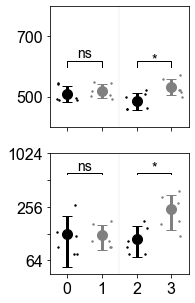

In [15]:
samples = {}
samples['wt-Δlon-ΔsulA-pRFP+'] = ['160 M225-1_20230826','160 M225-2_20230826','160 M225-3_20230826','160 M225-4_20230826','160 M225-5_20230826','160 M225-6_20230826']
samples['wt-Δlon-ΔsulA-pYqgE+'] = ['160 M195-1_20230826','160 M195-2_20230826','160 M195-3_20230826','160 M195-4_20230826','160 M195-5_20230826','160 M195-6_20230826']
samples['wt-ΔsulA-pRFP+'] = ['172 M225-1_20230826','172 M225-2_20230826','172 M225-3_20230826','172 M225-4_20230826','172 M225-5_20230826','172 M225-6_20230826']
samples['wt-ΔsulA-pYqgE+'] = ['172 M195-1_20230826','172 M195-2_20230826','172 M195-3_20230826','172 M195-4_20230826','172 M195-5_20230826','172 M195-6_20230826']

appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)

cm = plt.cm.get_cmap('tab20')
cols = ['k','grey','k','grey'] 

## right panel
cm = plt.cm.get_cmap('tab20')

cols = ['k','grey','k','grey'] 

def f(rep):
    return(appearance_times.loc[rep,'appearance'].mean())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))

to_plot = ['wt-Δlon-ΔsulA-pRFP+','wt-Δlon-ΔsulA-pYqgE+','wt-ΔsulA-pRFP+','wt-ΔsulA-pYqgE+']

print('stats for means: wt-Δlon-ΔsulA-pRFP+ vs wt-Δlon-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-Δlon-ΔsulA-pRFP+'],s_func['wt-Δlon-ΔsulA-pYqgE+']))
print('stats for means: wt-ΔsulA-pRFP+ vs wt-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-ΔsulA-pRFP+'],s_func['wt-ΔsulA-pYqgE+']))
print('stats for means: wt-Δlon-ΔsulA-pYqgE+ vs wt-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-Δlon-ΔsulA-pYqgE+'],s_func['wt-ΔsulA-pYqgE+']))

fig,(ax,ax2) = plt.subplots(2,1,figsize=(3,4.5),sharex=True)
x = np.arange(0,len(to_plot))
means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,sample,col in zip(x,to_plot,cols):
    y = pd.Series(s_func[sample])
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.3)) for i in range(0,len(y))]
    ax.scatter([x+y for x,y in zip([x_val]*len(y),l)],y,s=2,color=col)
    ax.errorbar(x_val,y.mean(),yerr=y.std(),fmt=".",markersize=20,capsize=5,color=col)
    
def f(rep):
    return(appearance_times.loc[rep,'appearance'].max()-appearance_times.loc[rep,'appearance'].min())
s_func = {}
for s in samples.keys():
    s_func[s] = []
    for rep in samples[s]:
        s_func[s].append(f(rep))
        
print('stats for range: wt-Δlon-ΔsulA-pRFP+ vs wt-Δlon-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-Δlon-ΔsulA-pRFP+'],s_func['wt-Δlon-ΔsulA-pYqgE+']))
print('stats for range: wt-ΔsulA-pRFP+ vs wt-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-ΔsulA-pRFP+'],s_func['wt-ΔsulA-pYqgE+']))
print('stats for range: wt-Δlon-ΔsulA-pYqgE+ vs wt-ΔsulA-pYqgE+')
print(st.mannwhitneyu(s_func['wt-Δlon-ΔsulA-pYqgE+'],s_func['wt-ΔsulA-pYqgE+']))

means = [np.mean(s_func[x]) for x in to_plot]
stdevs = [np.std(s_func[x]) for x in to_plot]
for x_val,sample,col in zip(x,to_plot,cols):
    y = pd.Series(s_func[sample])
    l = []
    [l.append(np.random.choice([-1, 1]) * random.uniform(0.2,0.3)) for i in range(0,len(y))]
    ax2.scatter([x+y for x,y in zip([x_val]*len(y),l)],y,s=2,color=col)
    ax2.errorbar(x_val,y.mean(),yerr=y.std(),fmt=".",markersize=20,capsize=5,color=col)

ax2.set_xlim(-0.5,len(to_plot)-0.5)
ax2.set_xticks(np.arange(0,len(to_plot)))

ax.set_ylim(400,800)
ax.set_yticks([500,700])
ax.set_yticklabels([500,700])

ax2.set_yscale('log',base=2)
ax2.set_ylim(2**5.5,2**10)
ax2.set_yticks([2**6,2**7,2**8,2**9,2**10])
ax2.set_yticklabels([2**6,'',2**8,'',2**10])


x1 = 0
x2 = 1
y = 600
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 600
h = 20
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y, "*", ha='center', va='bottom', color='k',size=14)

x1 = 0
x2 = 1
y = 600
h = 20
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 600
h = 20
ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax2.text((x1+x2)*.5, y, "*", ha='center', va='bottom', color='k',size=14)

ax.axvline(1.5,color='grey',linewidth=0.2,alpha=0.5)
ax2.axvline(1.5,color='grey',linewidth=0.2,alpha=0.5)

plt.tight_layout()
plt.savefig('figures/figED11o.pdf')



samples['wt-Δlon-ΔsulA-pRFP+'] = ['160 M225-1_20230826','160 M225-2_20230826','160 M225-3_20230826','160 M225-4_20230826','160 M225-5_20230826','160 M225-6_20230826']
samples['wt-Δlon-ΔsulA-pYqgE+'] = ['160 M195-1_20230826','160 M195-2_20230826','160 M195-3_20230826','160 M195-4_20230826','160 M195-5_20230826','160 M195-6_20230826']
samples['wt-ΔsulA-pRFP+'] = ['172 M225-1_20230826','172 M225-2_20230826','172 M225-3_20230826','172 M225-4_20230826','172 M225-5_20230826','172 M225-6_20230826']
samples['wt-ΔsulA-pYqgE+'] = ['172 M195-1_20230826','172 M195-2_20230826','172 M195-3_20230826','172 M195-4_20230826','172 M195-5_20230826','172 M195-6_20230826']

all_df = pd.DataFrame()
appearance_times = pd.read_csv('source_data/included/appearance_times_all.txt',sep='\t',index_col=0)
for s_type in samples.keys():
    for s in samples[s_type]:
        df = appearance_times.loc[s]
        df = df.reset_index()
        df = df.drop('tp',axis=1)
        df.columns = [s]
        all_df = all_df.merge(df,left_index=True,right_index=True,how='outer')
all_df.to_csv('source_data/source_tables/figED11o.csv')

MannwhitneyuResult(statistic=3.5, pvalue=0.12126278098928583)
MannwhitneyuResult(statistic=0.0, pvalue=0.015191410988288745)
MannwhitneyuResult(statistic=3.0, pvalue=0.09563349343943439)
MannwhitneyuResult(statistic=0.5, pvalue=0.01310301819086912)
MannwhitneyuResult(statistic=1.5, pvalue=0.013901481217324636)


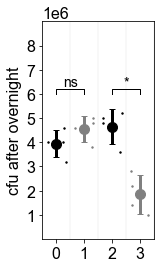

In [16]:
cm = plt.cm.get_cmap('tab20')
table = pd.read_csv('source_data/included/figED11_CFU_table.csv',sep=',',index_col=0)
fig,ax = plt.subplots(figsize=(2,4))
y1 = table.loc[(table['strain']=='MG1655-Δlon-ΔsulA-pRFP+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.25,0.35)) for i in range(0,len(y1))]
ax.scatter([x+y for x,y in zip([0]*len(y1),l)],y1,s=2,color='k')
ax.errorbar(0,y1.mean(),xerr=None,marker='.',markersize=20,yerr=y1.std(),color='k',capsize=3)
y2 = table.loc[(table['strain']=='MG1655-Δlon-ΔsulA-pYqgE+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.25,0.35)) for i in range(0,len(y2))]
ax.scatter([x+y for x,y in zip([1]*len(y2),l)],y2,s=2,color='grey')
ax.errorbar(1,y2.mean(),xerr=None,marker='.',markersize=20,yerr=y2.std(),color='grey',capsize=3)
y3 = table.loc[(table['strain']=='MG1655-ΔsulA-pRFP+'),'cfu']
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.25,0.35)) for i in range(0,len(y3))]
ax.scatter([x+y for x,y in zip([2]*len(y3),l)],y3,s=2,color='k')
ax.errorbar(2,y3.mean(),xerr=None,marker='.',markersize=20,yerr=y3.std(),color='k',capsize=3)
y4 = table.loc[(table['strain']=='MG1655-ΔsulA-pYqgE+'),'cfu']
ax.errorbar(3,y4.mean(),xerr=None,marker='.',markersize=20,yerr=y4.std(),color='grey',capsize=3)
l = []
[l.append(np.random.choice([-1, 1]) * random.uniform(0.25,0.35)) for i in range(0,len(y4))]
ax.scatter([x+y for x,y in zip([3]*len(y4),l)],y4,s=2,color='grey')

ax.set_xlim(-0.5,3.5)
ax.set_xticks([0,1,2,3])

for i in [0.5,1.5,2.5,3.5]:
    ax.axvline(i,color='grey',linewidth=0.2,alpha=0.5)
ax.set_ylabel('cfu after overnight',size=16)
ax.set_ylim(0.01*10**6,9*10**6)
ax.set_yticks([1*10**6,2*10**6,3*10**6,4*10**6,5*10**6,6*10**6,7*10**6,8*10**6])

print(st.mannwhitneyu(y1,y2))
print(st.mannwhitneyu(y3,y4)) 
print(st.mannwhitneyu(y3,y1)) 
print(st.mannwhitneyu(y1,y5)) 
print(st.mannwhitneyu(y5,y6)) 

x1 = 0
x2 = 1
y = 6*10**(6)
h = 0.2*10**(6)
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color='k',size=14)

x1 = 2
x2 = 3
y = 6*10**(6)
h = 0.2*10**(6)
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c='k')
ax.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color='k',size=14)

plt.savefig('figures/figED11p.pdf')